In [1]:
%pylab inline
import matplotlib.pyplot  as plt
from matplotlib.mlab import griddata
from numpy import *
#import numpy as np
from scipy import interpolate
import mdtraj as md
import math
import sys,os
import glob
import seaborn as sbn
sbn.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


Since the computation time may be long do not run the cell below, but run dict_energy cell, which has already all the info

In [8]:
#Do not run, here I have extracted the energy from the output and put in a dictionary along with phi and psi keys
input_files = glob.glob("quantum_outputs/*/structure*.out")

dict_energy = {}
for f in input_files:
    phi = f.split("/")[1]
    psi = f.split("/")[-1].split(".out")[0].split("structure_")[1]
    gout = open(f,"r").readlines()
    #Extract energies
    scf = []
    for line in gout:
        if "SCF Done" in line:
            scf.append(line.split()[4])
    dict_energy[phi,psi] = scf[-1]
#print("Energy is")
#print(scf[-1])    


In [2]:
#Since the cell above may take some time;
dict_energy = {('0', '0'): '-983.541955917',
 ('0', '120'): '-984.552155761',
 ('0', '150'): '-984.543834136',
 ('0', '180'): '-984.531240713',
 ('0', '210'): '-984.538998895',
 ('0', '240'): '-984.547490939',
 ('0', '270'): '-984.552116306',
 ('0', '30'): '-984.546097093',
 ('0', '300'): '-984.550825791',
 ('0', '330'): '-984.546372722',
 ('0', '60'): '-984.549883855',
 ('0', '90'): '-984.554005875',
 ('120', '0'): '-984.556956071',
 ('120', '120'): '-984.553294146',
 ('120', '150'): '-984.555520965',
 ('120', '180'): '-984.556568043',
 ('120', '210'): '-984.557041096',
 ('120', '240'): '-984.556094843',
 ('120', '270'): '-984.554024410',
 ('120', '30'): '-984.553309914',
 ('120', '300'): '-984.555997776',
 ('120', '330'): '-984.557686721',
 ('120', '60'): '-984.551509538',
 ('120', '90'): '-984.552733666',
 ('150', '0'): '-984.554947586',
 ('150', '120'): '-984.556666794',
 ('150', '150'): '-984.560780696',
 ('150', '180'): '-984.560900661',
 ('150', '210'): '-984.558208136',
 ('150', '240'): '-984.556977224',
 ('150', '270'): '-984.554438559',
 ('150', '30'): '-984.551225185',
 ('150', '300'): '-984.555558300',
 ('150', '330'): '-984.557460353',
 ('150', '60'): '-984.553731292',
 ('150', '90'): '-984.553675659',
 ('180', '0'): '-984.558032964',
 ('180', '120'): '-984.564487027',
 ('180', '150'): '-984.567206695',
 ('180', '180'): '-984.566850694',
 ('180', '210'): '-984.563473208',
 ('180', '240'): '-984.559707916',
 ('180', '270'): '-984.556475050',
 ('180', '30'): '-984.560785930',
 ('180', '300'): '-984.558631384',
 ('180', '330'): '-984.559582873',
 ('180', '60'): '-984.560088379',
 ('180', '90'): '-984.560555196',
 ('210', '0'): '-984.563959319',
 ('210', '120'): '-984.566903362',
 ('210', '150'): '-984.569086613',
 ('210', '180'): '-984.568435996',
 ('210', '210'): '-984.565054586',
 ('210', '240'): '-984.560725551',
 ('210', '270'): '-984.559053033',
 ('210', '30'): '-984.565070429',
 ('210', '300'): '-984.560440214',
 ('210', '330'): '-984.560016648',
 ('210', '60'): '-984.563472142',
 ('210', '90'): '-984.563978697',
 ('240', '0'): '-984.565597649',
 ('240', '120'): '-984.566575007',
 ('240', '150'): '-984.567967100',
 ('240', '180'): '-984.566495789',
 ('240', '210'): '-984.562637480',
 ('240', '240'): '-984.559594837',
 ('240', '270'): '-984.558977635',
 ('240', '30'): '-984.565142577',
 ('240', '300'): '-984.559629382',
 ('240', '330'): '-984.562866338',
 ('240', '60'): '-984.563879845',
 ('240', '90'): '-984.564719816',
 ('270', '0'): '-984.565817330',
 ('270', '120'): '-984.566270584',
 ('270', '150'): '-984.567035074',
 ('270', '180'): '-984.565351288',
 ('270', '210'): '-984.561671049',
 ('270', '240'): '-984.558611143',
 ('270', '270'): '-984.557561416',
 ('270', '30'): '-984.564115509',
 ('270', '300'): '-984.559776193',
 ('270', '330'): '-984.564834467',
 ('270', '60'): '-984.565081254',
 ('270', '90'): '-984.565946737',
 ('30', '0'): '-984.551162777',
 ('30', '120'): '-984.543736157',
 ('30', '150'): '-984.540679868',
 ('30', '180'): '-984.547588658',
 ('30', '210'): '-984.554289345',
 ('30', '240'): '-984.556109628',
 ('30', '270'): '-984.552166443',
 ('30', '30'): '-984.553409706',
 ('30', '300'): '-984.549713424',
 ('30', '330'): '-984.550160808',
 ('30', '60'): '-984.557587056',
 ('30', '90'): '-984.552414152',
 ('300', '0'): '-984.561120793',
 ('300', '120'): '-984.564919676',
 ('300', '150'): '-984.566205000',
 ('300', '180'): '-984.562997299',
 ('300', '210'): '-984.555793734',
 ('300', '240'): '-984.551082064',
 ('300', '270'): '-984.552332369',
 ('300', '30'): '-984.558951833',
 ('300', '300'): '-984.560167731',
 ('300', '330'): '-984.564830346',
 ('300', '60'): '-984.559932277',
 ('300', '90'): '-984.562567198',
 ('330', '0'): '-984.549992203',
 ('330', '120'): '-984.560365716',
 ('330', '150'): '-984.558084030',
 ('330', '180'): '-984.549336364',
 ('330', '210'): '-984.537455975',
 ('330', '240'): '-984.538730581',
 ('330', '270'): '-984.549402350',
 ('330', '30'): '-984.548147874',
 ('330', '300'): '-984.558699014',
 ('330', '330'): '-984.555604926',
 ('330', '60'): '-984.550220181',
 ('330', '90'): '-984.554950299',
 ('60', '0'): '-984.566098613',
 ('60', '120'): '-984.551610251',
 ('60', '150'): '-984.555392292',
 ('60', '180'): '-984.559690817',
 ('60', '210'): '-984.561135310',
 ('60', '240'): '-984.559691234',
 ('60', '270'): '-984.558087450',
 ('60', '30'): '-984.562204993',
 ('60', '300'): '-984.568925843',
 ('60', '330'): '-984.565730898',
 ('60', '60'): '-984.559600680',
 ('60', '90'): '-984.553193909',
 ('90', '0'): '-984.560645935',
 ('90', '120'): '-984.554902368',
 ('90', '150'): '-984.557067050',
 ('90', '180'): '-984.558235858',
 ('90', '210'): '-984.558592419',
 ('90', '240'): '-984.557851472',
 ('90', '270'): '-984.558212819',
 ('90', '30'): '-984.559365426',
 ('90', '300'): '-984.560625261',
 ('90', '330'): '-984.560752065',
 ('90', '60'): '-984.555441709',
 ('90', '90'): '-984.554196478'}

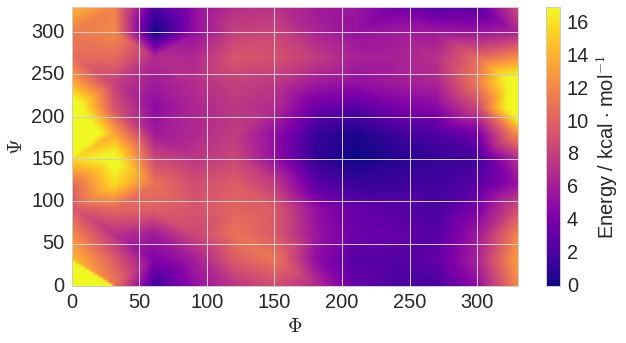

In [18]:
#Here I show an adiabatic plot with interpolation. The energy are rescaled so the min energy = 0
phi = []
psi = []
z = []
for key in dict_energy:
    phi.append(int(key[0]))
    psi.append(int(key[1]))
    #fe = -0.593*log(float(dict_energy[key]))
    z.append(float(dict_energy[key])*627.50) #kcal/mol
    
energies = []
#let's keep the relative energies with min = 0.0 
min_en = min(z)
counter = 0

for elem in z:
    scaled_en = elem - min_en
    energies.append(scaled_en)
       
#let's create all teh arrays
phi = asarray(phi)
psi = asarray(psi)
energies = asarray(energies)
#now create the meshgrid
xi,yi =  linspace(phi.min(),phi.max(),100), linspace(psi.min(),psi.max(),100)
xi,yi = meshgrid(xi,yi)

# Interpolate; there's also method='cubic' for 2-D data such as here
#rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
#zi = rbf(xi, yi)
zi = interpolate.griddata((phi, psi), energies, (xi, yi), method='linear')


fig, ax = plt.subplots(figsize=(10,5))
cax = ax.imshow(zi, vmin=energies.min(), vmax=17, origin='lower',
           extent=[phi.min(), phi.max(), psi.min(), psi.max()],aspect="auto",\
          cmap=cmap )
#17 is a good cutoff value
ax.set_xlabel("$\Phi$",fontsize=20)
ax.set_ylabel("$\Psi$",fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
cbar = fig.colorbar(cax)
cbar.ax.set_ylabel("Energy / kcal $\cdot$ mol$^{-1}$",fontsize=20)
cbar.ax.tick_params(labelsize=20)



In [2]:
dict_backup = {('0', '0'): '-983.541955917',
 ('0', '120'): '-984.552155761',
 ('0', '150'): '-984.543834136',
 ('0', '180'): '-984.531240713',
 ('0', '210'): '-984.538998895',
 ('0', '240'): '-984.547490939',
 ('0', '270'): '-984.552116306',
 ('0', '30'): '-984.546097093',
 ('0', '300'): '-984.550825791',
 ('0', '330'): '-984.546372722',
 ('0', '60'): '-984.549883855',
 ('0', '90'): '-984.554005875',
 ('120', '0'): '-984.556956071',
 ('120', '120'): '-984.553294146',
 ('120', '150'): '-984.555520965',
 ('120', '180'): '-984.556568043',
 ('120', '210'): '-984.557041096',
 ('120', '240'): '-984.556094843',
 ('120', '270'): '-984.554024410',
 ('120', '30'): '-984.553309914',
 ('120', '300'): '-984.555997776',
 ('120', '330'): '-984.557686721',
 ('120', '60'): '-984.551509538',
 ('120', '90'): '-984.552733666',
 ('150', '0'): '-984.554947586',
 ('150', '120'): '-984.556666794',
 ('150', '150'): '-984.560780696',
 ('150', '180'): '-984.560900661',
 ('150', '210'): '-984.558208136',
 ('150', '240'): '-984.556977224',
 ('150', '270'): '-984.554438559',
 ('150', '30'): '-984.551225185',
 ('150', '300'): '-984.555558300',
 ('150', '330'): '-984.557460353',
 ('150', '60'): '-984.553731292',
 ('150', '90'): '-984.553675659',
 ('180', '0'): '-984.558032964',
 ('180', '120'): '-984.564487027',
 ('180', '150'): '-984.567206695',
 ('180', '180'): '-984.566850694',
 ('180', '210'): '-984.563473208',
 ('180', '240'): '-984.559707916',
 ('180', '270'): '-984.556475050',
 ('180', '30'): '-984.560785930',
 ('180', '300'): '-984.558631384',
 ('180', '330'): '-984.559582873',
 ('180', '60'): '-984.560088379',
 ('180', '90'): '-984.560555196',
 ('210', '0'): '-984.563959319',
 ('210', '120'): '-984.566903362',
 ('210', '150'): '-984.569086613',
 ('210', '180'): '-984.568435996',
 ('210', '210'): '-984.565054586',
 ('210', '240'): '-984.560725551',
 ('210', '270'): '-984.559053033',
 ('210', '30'): '-984.565070429',
 ('210', '300'): '-984.560440214',
 ('210', '330'): '-984.560016648',
 ('210', '60'): '-984.563472142',
 ('210', '90'): '-984.563978697',
 ('240', '0'): '-984.565597649',
 ('240', '120'): '-984.566575007',
 ('240', '150'): '-984.567967100',
 ('240', '180'): '-984.566495789',
 ('240', '210'): '-984.562637480',
 ('240', '240'): '-984.559594837',
 ('240', '270'): '-984.558977635',
 ('240', '30'): '-984.565142577',
 ('240', '300'): '-984.559629382',
 ('240', '330'): '-984.562866338',
 ('240', '60'): '-984.563879845',
 ('240', '90'): '-984.564719816',
 ('270', '0'): '-984.565817330',
 ('270', '120'): '-984.566270584',
 ('270', '150'): '-984.567035074',
 ('270', '180'): '-984.565351288',
 ('270', '210'): '-984.561671049',
 ('270', '240'): '-984.558611143',
 ('270', '270'): '-984.557561416',
 ('270', '30'): '-984.564115509',
 ('270', '300'): '-984.559776193',
 ('270', '330'): '-984.564834467',
 ('270', '60'): '-984.565081254',
 ('270', '90'): '-984.565946737',
 ('30', '0'): '-984.551162777',
 ('30', '120'): '-984.543736157',
 ('30', '150'): '-984.540679868',
 ('30', '180'): '-984.547588658',
 ('30', '210'): '-984.554289345',
 ('30', '240'): '-984.556109628',
 ('30', '270'): '-984.552166443',
 ('30', '30'): '-984.553409706',
 ('30', '300'): '-984.549713424',
 ('30', '330'): '-984.550160808',
 ('30', '60'): '-984.557587056',
 ('30', '90'): '-984.552414152',
 ('300', '0'): '-984.561120793',
 ('300', '120'): '-984.564919676',
 ('300', '150'): '-984.566205000',
 ('300', '180'): '-984.562997299',
 ('300', '210'): '-984.555793734',
 ('300', '240'): '-984.551082064',
 ('300', '270'): '-984.552332369',
 ('300', '30'): '-984.558951833',
 ('300', '300'): '-984.560167731',
 ('300', '330'): '-984.564830346',
 ('300', '60'): '-984.559932277',
 ('300', '90'): '-984.562567198',
 ('330', '0'): '-984.549992203',
 ('330', '120'): '-984.560365716',
 ('330', '150'): '-984.558084030',
 ('330', '180'): '-984.549336364',
 ('330', '210'): '-984.537455975',
 ('330', '240'): '-984.538730581',
 ('330', '270'): '-984.549402350',
 ('330', '30'): '-984.548147874',
 ('330', '300'): '-984.558699014',
 ('330', '330'): '-984.555604926',
 ('330', '60'): '-984.550220181',
 ('330', '90'): '-984.554950299',
 ('60', '0'): '-984.566098613',
 ('60', '120'): '-984.551610251',
 ('60', '150'): '-984.555392292',
 ('60', '180'): '-984.559690817',
 ('60', '210'): '-984.561135310',
 ('60', '240'): '-984.559691234',
 ('60', '270'): '-984.558087450',
 ('60', '30'): '-984.562204993',
 ('60', '300'): '-984.568925843',
 ('60', '330'): '-984.565730898',
 ('60', '60'): '-984.559600680',
 ('60', '90'): '-984.553193909',
 ('90', '0'): '-984.560645935',
 ('90', '120'): '-984.554902368',
 ('90', '150'): '-984.557067050',
 ('90', '180'): '-984.558235858',
 ('90', '210'): '-984.558592419',
 ('90', '240'): '-984.557851472',
 ('90', '270'): '-984.558212819',
 ('90', '30'): '-984.559365426',
 ('90', '300'): '-984.560625261',
 ('90', '330'): '-984.560752065',
 ('90', '60'): '-984.555441709',
 ('90', '90'): '-984.554196478'}